<a href="https://colab.research.google.com/github/carlakim/SNA/blob/main/SNA_Final_Explicar_e_CONMEBOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA Copa do mundo:
database feito atraves do site "who scored" e feita a analise de jogo + analise de passos antes do gol também para cada jogo da seleção.


#Passos:
1.

2.


# CONMEBOL classificatórias database feita atraves de:
assistir os jogos e analisar os minutos antecedentes ao gol: +- 3 minutos antecedentes, ou quando a bola iniciou do centro, de uma falta, de uma lateral,  de um escanteio, de um isolamento, ou de um roubo.

#Passos:
1. colocar no gephi e ver iteração dos jogadores

2. depois colocar em uma imagem do campo

In [ ]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 2.8 MB/s 


In [ ]:
import json
import re
import io
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager

#Brasil vs todos

https://www.conmebol.com/analisis-del-partido/?competition=342&season=112022&match=2043649


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfBU1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SNA/78.csv")
print(dfBU1)

              source            target      type
0             Danilo  Bruno Guimarães   directed
1  1Bruno Guimarães         Marquinhos  directed
2         Marquinhos      Thiago Silva  directed
3       Thiago Silva          Fabinho   directed
4           Fabinho         Marquinhos  directed
5         Marquinhos          Fabinho   directed
6           Fabinho            Neymar   directed
7            Neymar   Bruno Guimarães   directed
8  2Bruno Guimarães        Richarlison  directed
9        Richarlison               GOL  directed


In [ ]:
id = [1,1,1,1,1,1,1,1,1,1]
dfBU1['pass_count'] = id

#add location to main df

x = [58,75,69,70,56,69,56,40,29,13]
y = [1,38,29,51,53,29,53,41,24,31]

endx = [75,69,70,56,69,56,40,29,13,0]
endy = [38,29,51,53,29,53,41,24,31,50]

dfBU1['x'] = x
dfBU1['y'] = y
dfBU1['endx'] = endx
dfBU1['endy'] = endy

In [ ]:
dfBU1

,source,target,type,pass_count,x,y,endx,endy,width
0,Danilo,Bruno Guimarães,directed,1,58,1,75,38,18.0
1,1Bruno Guimarães,Marquinhos,directed,1,75,38,69,29,18.0
2,Marquinhos,Thiago Silva,directed,1,69,29,70,51,18.0
3,Thiago Silva,Fabinho,directed,1,70,51,56,53,18.0
4,Fabinho,Marquinhos,directed,1,56,53,69,29,18.0
5,Marquinhos,Fabinho,directed,1,69,29,56,53,18.0
6,Fabinho,Neymar,directed,1,56,53,40,41,18.0
7,Neymar,Bruno Guimarães,directed,1,40,41,29,24,18.0
8,2Bruno Guimarães,Richarlison,directed,1,29,24,13,31,18.0
9,Richarlison,GOL,directed,1,13,31,0,50,18.0


In [ ]:
#find average location for all players in df dataframe
averagelocationBR1 = dfBU1.groupby('source').agg({'x':['mean'],'y':['mean','count']})
averagelocationBR1.columns = ['x','y','count']

averagelocasstionBR = dfBU1.groupby('target').agg({'endx':['mean'],'endy':['mean','count']})
averagelocasstionBR.columns = ['x','y','count']

averagelocationBR = pd.concat([averagelocationBR1,averagelocasstionBR])

#drop duplicates
averagelocationBR= averagelocationBR[~averagelocationBR.index.duplicated(keep='first')]

In [ ]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
dfBU1['width'] = (dfBU1.pass_count / dfBU1.pass_count.max() *
                           MAX_LINE_WIDTH)
averagelocationBR['marker_size'] = (averagelocationBR['count']
                                         / averagelocationBR['count'].max() * MAX_MARKER_SIZE)

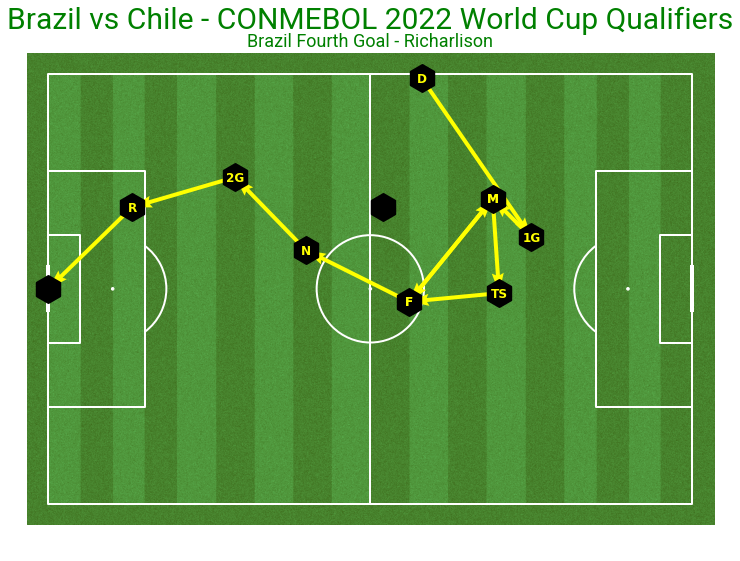

In [ ]:
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')


#opta
#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
fig, axs = pitch.grid(figheight=8, title_height=0.08, endnote_space=0,
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
#fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*dfBU1.x,.8*dfBU1.y,1.2*dfBU1.endx,.8*dfBU1.endy,lw=dfBU1.width,zorder=1, ax=axs['pitch'], color='yellow')

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,marker='h',
                      s = 700, color = 'black', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=axs['pitch'])

for index, row in dfBU1.iterrows():
    player_name = row["source"].split()
    player_initials = "".join(word[0] for word in player_name).upper()
    pitch.annotate(player_initials, xy=(1.2*row.x, 0.8*row.y), c='yellow', va='center',
                       ha='center', weight='bold',size=12, ax=axs['pitch'])


URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
robotto_regular = FontManager(URL)

# endnote /title
# axs['endnote'].text(1, 0.5, '@your_twitter_handle', color='#c7d5cc',
#                     va='center', ha='right', fontsize=15,
#                     fontproperties=robotto_regular.prop)
TITLE_TEXT = f'Brazil vs Chile - CONMEBOL 2022 World Cup Qualifiers'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='green',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, 'Brazil Fourth Goal - Richarlison', color='green',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_pass_network_002.png'
plt.savefig('BRCH4.png', bbox_inches='tight')
plt.show()  # If you are using a Jupyter notebook you do not need this line